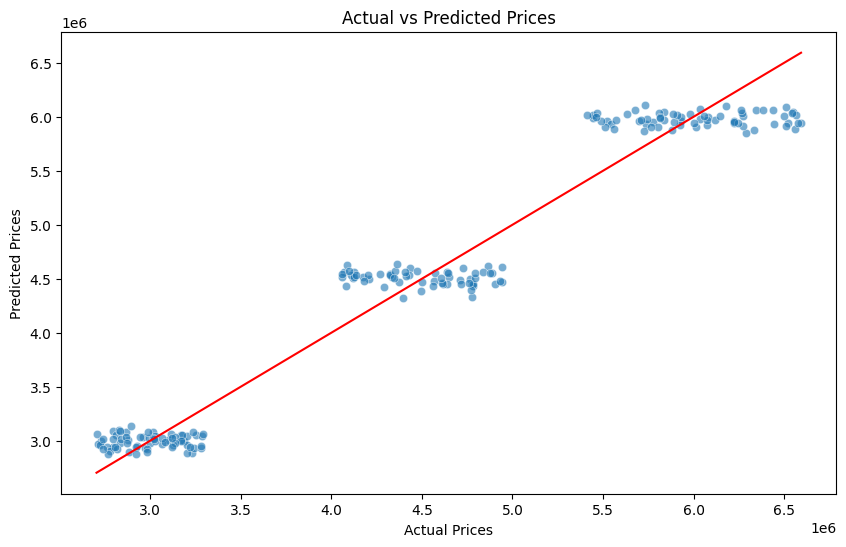

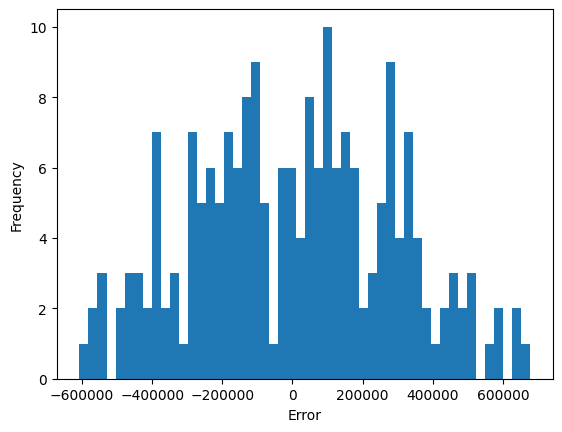

MAE: 237216.95
RMSE: 284636.07
R² Score: 0.95
Accuracy: 0.91


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("Real_Estate_Sales_Data.csv")

# Feature Engineering
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_month'] = df['sale_date'].dt.month
df['sale_dayofweek'] = df['sale_date'].dt.dayofweek

# Drop unnecessary columns
df = df.drop(columns=['transaction_id', 'sale_date'])

# Define features and target
X = df.drop(columns='selling_price')
y = df['selling_price']

# Categorical columns for encoding
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Pipeline: Encoding + Linear Regression
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Plot predicted vs actual prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Plot distribution of errors
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Evaluate the model using MAE, RMSE, R² Score, and Accuracy Score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.10)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Accuracy: {accuracy:.2f}')


`There is a positive correlation between actual and predicted prices. As actual prices increase, predicted prices tend to increase as well. The linear regression model provides a useful starting point, but there is room for improvement to enhance predictive accuracy. The distribution of errors indicates a mix of performance outcomes, with a notable incidence of errors clustering around zero and varying levels of both positive and negative errors across the spectrum. Further analysis could be beneficial to identify the causes of these errors and implement corrective actions.`



`The linear regression model performed exceptionally well, with an R² of 0.951 and 91% prediction accuracy, indicating strong predictive power and reliable generalization. The low MAE and RMSE suggest the model makes consistently accurate price estimates, making it suitable for real estate pricing insights. While already effective, it could be further improved with more features or advanced models.`



